In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### Reading and Understaning Data

In [273]:
data = pd.read_csv('weather.csv')

In [274]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [276]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,366.0,7.265574,6.025800,-5.3,2.300,7.45,12.500,20.9
MaxTemp,366.0,20.550273,6.690516,7.6,15.025,19.65,25.500,35.8
Rainfall,366.0,1.428415,4.225800,0.0,0.000,0.00,0.200,39.8
Evaporation,366.0,4.521858,2.669383,0.2,2.200,4.20,6.400,13.8
Sunshine,363.0,7.909366,3.481517,0.0,5.950,8.60,10.500,13.6
WindGustSpeed,364.0,39.840659,13.059807,13.0,31.000,39.00,46.000,98.0
WindSpeed9am,359.0,9.651811,7.951929,0.0,6.000,7.00,13.000,41.0
WindSpeed3pm,366.0,17.986339,8.856997,0.0,11.000,17.00,24.000,52.0
Humidity9am,366.0,72.035519,13.137058,36.0,64.000,72.00,81.000,99.0
Humidity3pm,366.0,44.519126,16.850947,13.0,32.250,43.00,55.000,96.0


In [277]:
data['RainTomorrow'].value_counts()

No     300
Yes     66
Name: RainTomorrow, dtype: int64

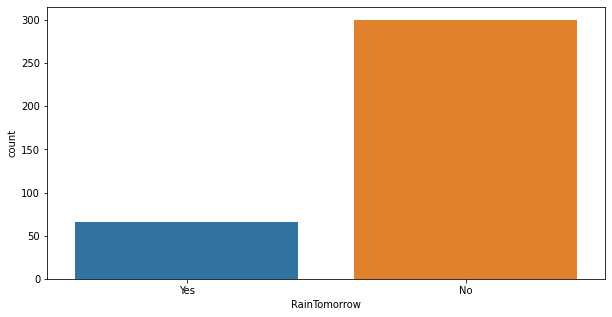

In [278]:
plt.subplots(figsize = (10, 5))
sns.countplot(x='RainTomorrow', data=data);

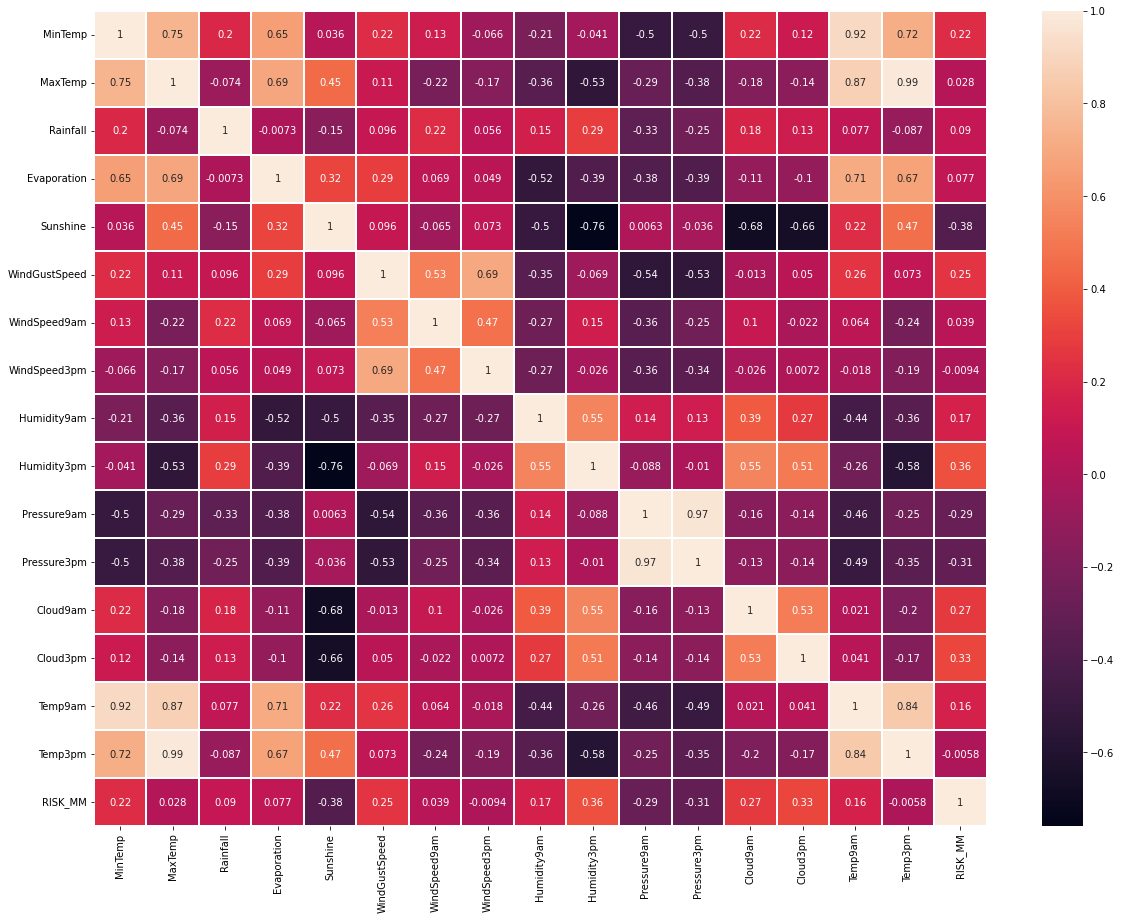

In [279]:
plt.subplots(figsize = (20, 15))
sns.heatmap(data.corr(), linewidth = 0.1, annot=True);

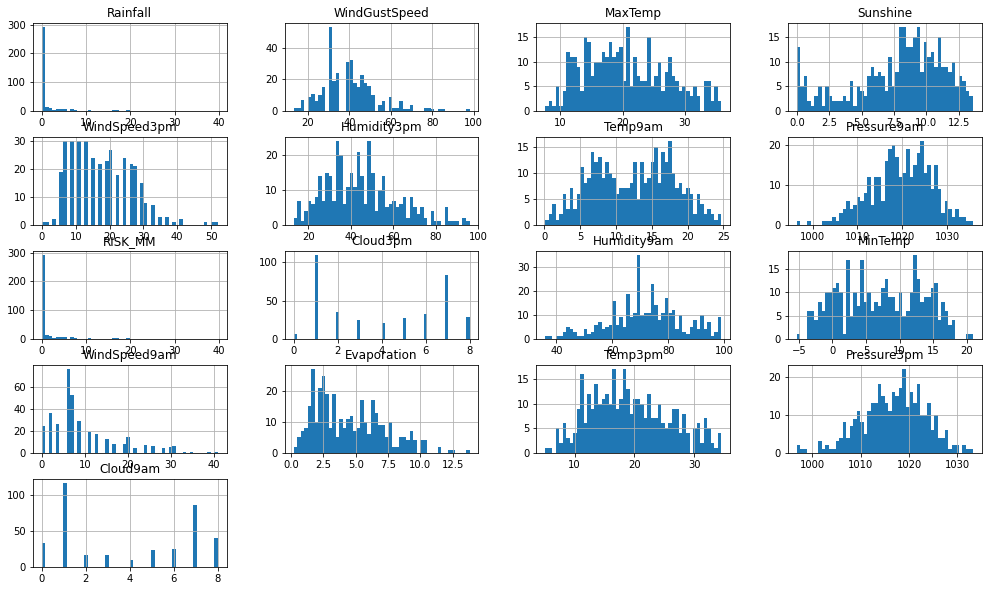

In [280]:
num_col = list(set(data.describe().columns))
data[num_col].hist(bins = 50, figsize = (17, 10));

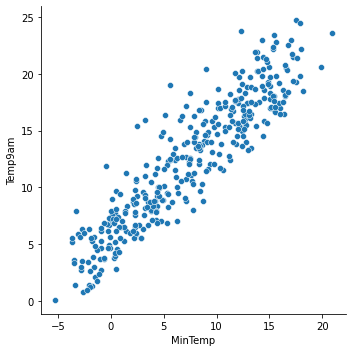

In [281]:
sns.relplot(data=data, x='MinTemp', y='Temp9am');

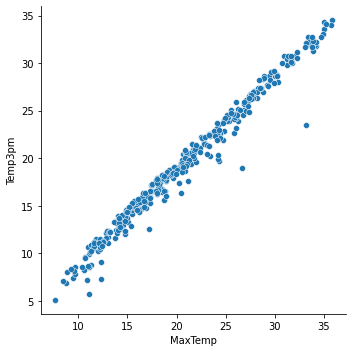

In [282]:
sns.relplot(x='MaxTemp',y='Temp3pm',data=data);

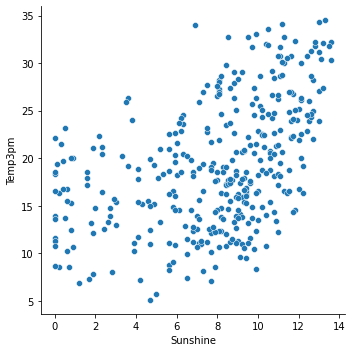

In [283]:
sns.relplot(data=data, x='Sunshine',y='Temp3pm');

In [284]:
data.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [285]:
data.skew()

MinTemp         -0.003811
MaxTemp          0.350377
Rainfall         4.590163
Evaporation      0.663658
Sunshine        -0.729472
WindGustSpeed    0.843041
WindSpeed9am     1.371612
WindSpeed3pm     0.596150
Humidity9am     -0.141457
Humidity3pm      0.594731
Pressure9am     -0.348591
Pressure3pm     -0.295247
Cloud9am         0.080433
Cloud3pm         0.072898
Temp9am         -0.021783
Temp3pm          0.303510
RISK_MM          4.590163
dtype: float64

### Pre-Processing functions used  

##### Numerical and Categorical Columns

In [286]:
def divid_data(data):
    num_col = list(set(data.describe().columns))
    cat_col = list(set(data.columns) - set(num_col))
    return num_col, cat_col

##### Nulls Handling

In [287]:
def get_nulls(data):
    df_nulls = data.isna().sum().reset_index().rename(columns={ 0 : 'nulls_count'})
    return df_nulls[df_nulls['nulls_count'] > 0].sort_values(by=['nulls_count'], ascending=False)

def nulls_handler(data):

    df_nulls = data.isna().sum().reset_index().rename(columns={ 0 : 'nulls_count'})
    df_nulls = df_nulls[df_nulls['nulls_count'] > 0].sort_values(by=['nulls_count'], ascending=False)

    cols_to_drop = []
    fturs_to_fill = []
    rows_to_drop = []

    for index, row in df_nulls.iterrows():
        if row['nulls_count'] / data.shape[0] > 0.25:
            cols_to_drop.append(row["index"])
            print(f"{row['index']} dropped")
        if row['nulls_count'] / data.shape[0] < 0.10:
            rows_to_drop.append(row["index"])
            print(f"Nan rows removed from {row['index']}")
        if row['nulls_count'] / data.shape[0] < 0.25 and row['nulls_count'] / data.shape[0] > 0.10:
            fturs_to_fill.append(row['index'])
            print(f"{row['index']} replaced with mean")
    
    data = data.drop(columns=cols_to_drop)
    data[fturs_to_fill] = data[fturs_to_fill].fillna(data[fturs_to_fill].mean(), axis=0)
    data = data.dropna(subset=rows_to_drop, axis=0)
    
    return data

##### Outliers Clamping

In [288]:
def outliers_clamper(data, num_cols, threshold=1.5):
    for col in num_cols:
        Q1 = np.percentile(data[col], q = 25, interpolation = 'midpoint')
        Q3 = np.percentile(data[col], q = 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        Upper_Bound = Q3 + (threshold*IQR)
        Lower_Bound = Q1 - (threshold*IQR)
        data.loc[data[col] > Upper_Bound, col] = Upper_Bound
        data.loc[data[col] < Lower_Bound, col] = Lower_Bound
    return data

##### Shapiro-Wike Test

In [289]:
def shapiro_test(data, cols, alpha=0.005):
    feats_std_scale = []
    feats_min_max_scale = []
    for col in cols:
        stat, p = stats.shapiro(data[col])

        if p > alpha:
            feats_std_scale.append(col)
        else:
            feats_min_max_scale.append(col)

    return feats_std_scale, feats_min_max_scale

##### Skewed Values Log Transformer

In [290]:
def skewness_handler(data):
    skewned_list =[]

    skewness = data.skew()

    for i in range(len(skewness)):
        if abs(skewness[i]) > 1:
            skewned_list.append(data.columns[i])
    for col in skewned_list:
        data[col] = np.log(1 + data[col])

    return data

#### Data Preprocessing and Handling

In [291]:
train, validation = train_test_split(data, test_size=0.20)

In [292]:
get_nulls(train)

,index,nulls_count
7,WindDir9am,27
9,WindSpeed9am,7
4,Sunshine,2
5,WindGustDir,1
6,WindGustSpeed,1
8,WindDir3pm,1


In [293]:
get_nulls(validation)

,index,nulls_count
7,WindDir9am,4
5,WindGustDir,2
4,Sunshine,1
6,WindGustSpeed,1


In [294]:
train = nulls_handler(train)

Nan rows removed from WindDir9am
Nan rows removed from WindSpeed9am
Nan rows removed from Sunshine
Nan rows removed from WindGustDir
Nan rows removed from WindGustSpeed
Nan rows removed from WindDir3pm


In [295]:
validation = nulls_handler(validation)

Nan rows removed from WindDir9am
Nan rows removed from WindGustDir
Nan rows removed from Sunshine
Nan rows removed from WindGustSpeed


In [296]:
train.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [297]:
num_col, cat_col = divid_data(data)

In [298]:
train = outliers_clamper(train, num_col)

In [299]:
train = skewness_handler(train)

In [300]:
train.skew()

MinTemp         -0.032293
MaxTemp          0.344986
Rainfall         1.134118
Evaporation      0.525397
Sunshine        -0.735763
WindGustSpeed    0.438121
WindSpeed9am     0.964887
WindSpeed3pm     0.498672
Humidity9am     -0.211055
Humidity3pm      0.447871
Pressure9am     -0.292494
Pressure3pm     -0.184100
Cloud9am         0.107598
Cloud3pm        -0.243441
Temp9am         -0.042438
Temp3pm          0.329597
RISK_MM          1.288759
dtype: float64

### Solving imbalance in data

In [301]:
from imblearn.over_sampling import RandomOverSampler

train_x, train_y = RandomOverSampler().fit_resample(train[(set(train.columns.to_list()) - set(['RainTomorrow']))], train[['RainTomorrow']])
val_x, val_y = RandomOverSampler().fit_resample(validation[(set(validation.columns.to_list()) - set(['RainTomorrow']))], validation[['RainTomorrow']])

In [302]:
train = train_x.merge(train_y, left_index=True, right_index=True)
validation = val_x.merge(val_y, left_index=True, right_index=True)

Yes    218
No     218
Name: RainTomorrow, dtype: int64


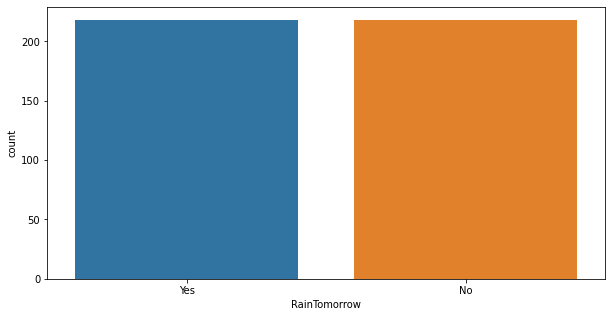

In [303]:
print(train['RainTomorrow'].value_counts())
plt.subplots(figsize = (10, 5))
sns.countplot(x='RainTomorrow', data=train);

No     50
Yes    50
Name: RainTomorrow, dtype: int64


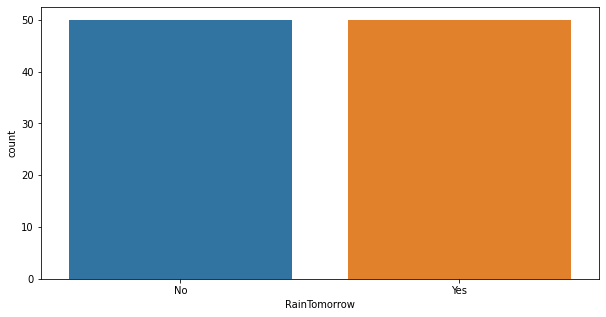

In [304]:
print(validation['RainTomorrow'].value_counts())
plt.subplots(figsize = (10, 5))
sns.countplot(x='RainTomorrow', data=validation);

#### Handle Categorical Features

In [305]:
train[cat_col].head()

,WindDir9am,WindGustDir,WindDir3pm,RainToday,RainTomorrow
0,WNW,NW,W,Yes,Yes
1,S,ENE,SW,No,No
2,SSE,NNW,N,No,No
3,ESE,N,NNW,No,No
4,E,E,NW,No,No


In [306]:
validation[cat_col].head()

,WindDir9am,WindGustDir,WindDir3pm,RainToday,RainTomorrow
0,SSE,NNW,NNW,Yes,No
1,SE,SE,ESE,No,No
2,SE,NE,E,No,No
3,SE,SSW,ENE,No,No
4,NW,N,NW,Yes,Yes


In [307]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()
train[['RainToday', 'RainTomorrow']] = ordinal_enc.fit_transform(train[['RainToday', 'RainTomorrow']])
validation[['RainToday', 'RainTomorrow']] = ordinal_enc.transform(validation[['RainToday', 'RainTomorrow']])

In [308]:
train[cat_col].head()

,WindDir9am,WindGustDir,WindDir3pm,RainToday,RainTomorrow
0,WNW,NW,W,1.0,1.0
1,S,ENE,SW,0.0,0.0
2,SSE,NNW,N,0.0,0.0
3,ESE,N,NNW,0.0,0.0
4,E,E,NW,0.0,0.0


In [309]:
validation[cat_col].head()

,WindDir9am,WindGustDir,WindDir3pm,RainToday,RainTomorrow
0,SSE,NNW,NNW,1.0,0.0
1,SE,SE,ESE,0.0,0.0
2,SE,NE,E,0.0,0.0
3,SE,SSW,ENE,0.0,0.0
4,NW,N,NW,1.0,1.0


In [310]:
num_col, cat_col = divid_data(train)

In [311]:
cat_col

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [312]:
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OrdinalEncoder()
train[cat_col] = onehot_enc.fit_transform(train[cat_col])
validation[cat_col] = onehot_enc.transform(validation[cat_col])

In [313]:
train[cat_col].head()

,WindGustDir,WindDir9am,WindDir3pm
0,7.0,14.0,13.0
1,1.0,8.0,12.0
2,6.0,10.0,3.0
3,3.0,2.0,6.0
4,0.0,0.0,7.0


In [314]:
validation[cat_col].head()

,WindGustDir,WindDir9am,WindDir3pm
0,6.0,10.0,6.0
1,9.0,9.0,2.0
2,4.0,9.0,0.0
3,11.0,9.0,1.0
4,3.0,7.0,7.0


#### Feature Engineering

In [315]:
feats_std_scale, feats_min_max_scale = shapiro_test(train, data.columns)

In [316]:
feats_min_max_scale

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

In [317]:
feats_std_scale

['Pressure9am', 'Pressure3pm']

In [318]:
feats_min_max_scale.remove('RainTomorrow')
feats_min_max_scale.remove('RainToday')

In [319]:
X_train = train[list(set(train.columns) - set(['RainTomorrow']))]
y_train = train[['RainTomorrow']]

X_val = validation[list(set(validation.columns) - set(['RainTomorrow']))]
y_val = validation[['RainTomorrow']]

In [320]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[feats_min_max_scale])
X_train[feats_min_max_scale] = scaler.transform(X_train[feats_min_max_scale])
X_val[feats_min_max_scale] = scaler.transform(X_val[feats_min_max_scale])

In [321]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train[feats_std_scale])
X_train[feats_std_scale] = scaler.transform(X_train[feats_std_scale])
X_val[feats_std_scale] = scaler.transform(X_val[feats_std_scale])

## ML Algorisms Evaluation

### 1 - Classification Models

#### Logistic Regression

In [322]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=150, tol=0.5).fit(X_train, y_train)

In [323]:
y_pred_logistic = logistic_model.predict(X_train)

In [324]:
accuracy_score(y_train, y_pred_logistic)

0.9678899082568807

In [325]:
print(classification_report(y_train, y_pred_logistic))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       218
         1.0       0.94      1.00      0.97       218

    accuracy                           0.97       436
   macro avg       0.97      0.97      0.97       436
weighted avg       0.97      0.97      0.97       436



In [326]:
y_pred_logistic_test = logistic_model.predict(X_val)

In [327]:
accuracy_score(y_val, y_pred_logistic_test)

0.96

In [328]:
print(classification_report(y_val, y_pred_logistic_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        50
         1.0       0.93      1.00      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [329]:
conf_matrix = pd.DataFrame(confusion_matrix(y_val, y_pred_logistic_test).T).rename(columns = {0 : 'Will Not Rain', 1: 'Will Rain'})
conf_matrix

,Will Not Rain,Will Rain
0,46,0
1,4,50


#### Support Vector Classifier

In [330]:
from sklearn.svm import SVC

In [331]:
svc_model = SVC(kernel='linear').fit(X_train, y_train)

In [332]:
y_pred_svc = svc_model.predict(X_train)
print(classification_report(y_train, y_pred_svc))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       218
         1.0       0.94      1.00      0.97       218

    accuracy                           0.97       436
   macro avg       0.97      0.97      0.97       436
weighted avg       0.97      0.97      0.97       436



In [333]:
accuracy_score(y_train, y_pred_svc)

0.9678899082568807

In [334]:
y_pred_svc_test = svc_model.predict(X_val)
print(classification_report(y_val, y_pred_svc_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        50
         1.0       0.93      1.00      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [335]:
accuracy_score(y_val, y_pred_svc_test)

0.96

In [336]:
conf_matrix = pd.DataFrame(confusion_matrix(y_val, y_pred_svc_test).T).rename(columns = {0 : 'Will Not Rain', 1: 'Will Rain'})
conf_matrix

,Will Not Rain,Will Rain
0,46,0
1,4,50


#### Decision Tree Classifier

In [337]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [338]:
tree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=3,
    max_features='auto'
).fit(X_train, y_train)

In [339]:
y_pred_tree = tree_model.predict(X_train)
print(classification_report(y_train, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       218
         1.0       0.96      0.96      0.96       218

    accuracy                           0.96       436
   macro avg       0.96      0.96      0.96       436
weighted avg       0.96      0.96      0.96       436



In [340]:
accuracy_score(y_train, y_pred_tree)

0.963302752293578

In [341]:
y_pred_tree_test = svc_model.predict(X_val)
print(classification_report(y_val, y_pred_tree_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        50
         1.0       0.93      1.00      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [342]:
accuracy_score(y_val, y_pred_tree_test)

0.96

In [343]:
conf_matrix = pd.DataFrame(confusion_matrix(y_val, y_pred_tree_test).T).rename(columns = {0 : 'Will Not Rain', 1: 'Will Rain'})
conf_matrix

,Will Not Rain,Will Rain
0,46,0
1,4,50


In [344]:
from sklearn.tree import export_text
text_representation = export_text(tree_model)
print(text_representation)

|--- feature_13 <= 0.71
|   |--- feature_12 <= 0.68
|   |   |--- feature_16 <= 0.67
|   |   |   |--- feature_8 <= 0.78
|   |   |   |   |--- feature_18 <= 0.21
|   |   |   |   |   |--- feature_13 <= 0.46
|   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_13 >  0.46
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_18 >  0.21
|   |   |   |   |   |--- feature_5 <= 0.90
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_5 >  0.90
|   |   |   |   |   |   |--- feature_6 <= 0.18
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_6 >  0.18
|   |   |   |   |   |   |   |--- feature_15 <= 0.63
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- feature_15 >  0.63
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_8 

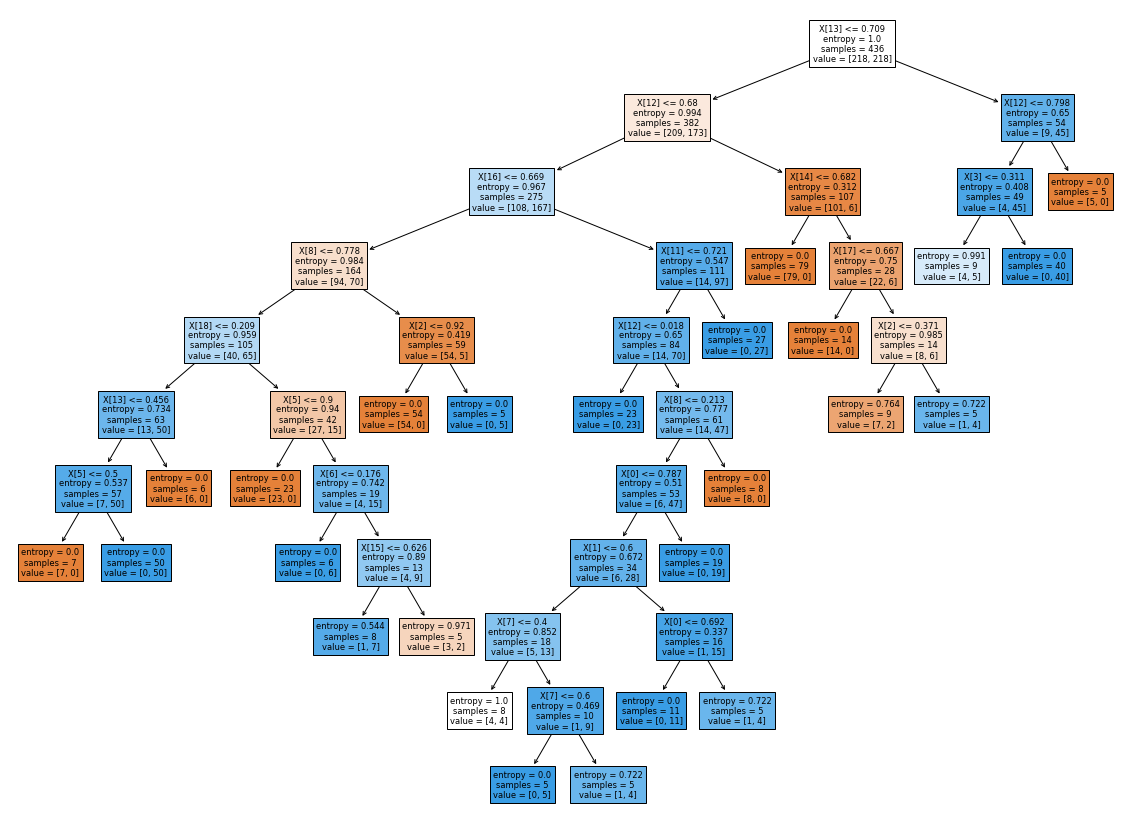

In [345]:
plt.figure(figsize=(20, 15))
plot_tree(tree_model, filled=True);

#### KNN Classifier

In [346]:
from sklearn.neighbors import KNeighborsClassifier

In [347]:
results = []
for neighbors in range(2, 20):
    model = KNeighborsClassifier(n_neighbors=neighbors).fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_val)
    results.append(f"on train: {accuracy_score(y_train, y_pred_train)}, on test: {accuracy_score(y_val, y_pred_test)}")

In [348]:
for i in range(0, 18):
    print(f"with {i+2} neighbors, {results[i]}")

with 2 neighbors, on train: 1.0, on test: 0.91
with 3 neighbors, on train: 0.9747706422018348, on test: 0.96
with 4 neighbors, on train: 0.9770642201834863, on test: 0.96
with 5 neighbors, on train: 0.9610091743119266, on test: 0.96
with 6 neighbors, on train: 0.963302752293578, on test: 0.96
with 7 neighbors, on train: 0.9587155963302753, on test: 0.95
with 8 neighbors, on train: 0.963302752293578, on test: 0.95
with 9 neighbors, on train: 0.963302752293578, on test: 0.94
with 10 neighbors, on train: 0.9541284403669725, on test: 0.96
with 11 neighbors, on train: 0.9518348623853211, on test: 0.95
with 12 neighbors, on train: 0.9518348623853211, on test: 0.95
with 13 neighbors, on train: 0.9472477064220184, on test: 0.95
with 14 neighbors, on train: 0.9357798165137615, on test: 0.95
with 15 neighbors, on train: 0.9357798165137615, on test: 0.93
with 16 neighbors, on train: 0.9380733944954128, on test: 0.93
with 17 neighbors, on train: 0.9518348623853211, on test: 0.91
with 18 neighbors,

In [367]:
knn_model = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

In [368]:
y_pred_knn = knn_model.predict(X_train)
accuracy_score(y_train, y_pred_knn)

0.963302752293578

In [369]:
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96       218
         1.0       0.93      1.00      0.96       218

    accuracy                           0.96       436
   macro avg       0.97      0.96      0.96       436
weighted avg       0.97      0.96      0.96       436



In [370]:
y_pred_knn_test = knn_model.predict(X_val)
accuracy_score(y_val, y_pred_knn_test)

0.96

In [371]:
print(classification_report(y_val, y_pred_knn_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        50
         1.0       0.93      1.00      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [372]:
conf_matrix = pd.DataFrame(confusion_matrix(y_val, y_pred_knn_test).T).rename(columns = {0 : 'Will Not Rain', 1: 'Will Rain'})
conf_matrix

,Will Not Rain,Will Rain
0,46,0
1,4,50


### Implement Classifiers From Scratch

#### 1 - Logistic Regression

In [355]:
class LogisticReg:
    def __init__(self, learning_rate, bias, threshold, max_iterations):
        self.learning_rate = learning_rate
        self.bias = bias
        self.threshold = threshold
        self.max_iterations = max_iterations

    def initialize(self, X):
        if self.bias:
            weights = np.zeros((X.shape[1] + 1, 1))
            X = np.c_[np.ones((X.shape[0], 1)), X]
        else:
            weights = np.zeros((X.shape[1], 1))
        return weights, X

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    def cost(self, X, y, theta):
        z = np.dot(X,theta)
        cost0 = y.T.dot(np.log(self.sigmoid(z)))
        cost1 = (1-y).T.dot(np.log(1-self.sigmoid(z)))
        cost = - ((cost1 + cost0)) / len(y) 
        return cost

    def fit(self, X, y):
        params, X = self.initialize(X)
        for _ in range(self.max_iterations):
            params = params - self.learning_rate * np.dot(X.T, self.sigmoid(X @ params) - np.reshape(y,(len(y), 1)))
        return params

    def predict(self, X, optimum_weights):
        z = np.dot(self.initialize(X)[1], optimum_weights)
        preds = []
        for i in self.sigmoid(z):
            if i > self.threshold:
                preds.append(1)
            else:
                preds.append(0)
        return preds

In [356]:
log_model_scratch = LogisticReg(learning_rate=0.001, bias=True, threshold=0.5, max_iterations=150)

In [357]:
optimum_weights = log_model_scratch.fit(X_train, y_train)

In [358]:
y_pred_log_scratch = log_model_scratch.predict(X_val, optimum_weights)

In [359]:
accuracy_score(y_val, y_pred_log_scratch)

0.97

In [360]:
print(classification_report(y_val, y_pred_log_scratch))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        50
         1.0       0.94      1.00      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [361]:
conf_matrix = pd.DataFrame(confusion_matrix(y_val, y_pred_log_scratch).T).rename(columns = {0 : 'Will Not Rain', 1: 'Will Rain'})
conf_matrix

,Will Not Rain,Will Rain
0,47,0
1,3,50
